<h1>Pesquisa Kaggle de Machine Learning e Data Science</h1>
<b>Éverton Bin</b><br>

<h2>Índice</h2>
<ol>
    <a href = '#intro'><li><b>Introdução</b></li></a>
    <a href = '#load'><li><b>Carregando os Dados</b></li></a>
    <a href = '#analysis'><li><b>Análise Exploratória</b></li></a>
        <ol>
            <a href = '#q1'><li><b>Educação</b></li></a>
            <a href = '#q2'><li><b>Atividades</b></li></a>
            <a href = '#q3'><li><b>Ferramentas</b></li></a>
            <a href = '#q4'><li><b>Salário</b></li></a>
        </ol>
    <a href = '#model'><li><b>Modelo Preditivo</b></a>
        <ol>
            <a href = '#model1'><li><b>Transformações</b></li></a>
            <a href = '#model2'><li><b>Seleção de Atributos</b></li></a>
            <a href = '#model3'><li><b>Treinamento do Modelo</b></li></a>
            <a href = '#model4'><li><b>Avaliação do Modelo</b></li></a>
        </ol>
     <a href = '#conclusion'><li><b>Conclusão</b></li></a>
</ol>

<h2>1- Introdução</h2>

<p>
    A Ciência de Dados ou Data Science tem se tornado cada vez mais popular ao longo dos anos e, provavelmente, uma das questões mais comuns é: <b>como eu começo uma carreira nesta área?</b>. E uma das respostas mais comuns deve ser: <b>comece participando de alguma competição no Kaggle!</b>.
</p>
<p>
    <a href = "https://www.kaggle.com/">Kaggle</a> é, de fato, uma das plataformas mais populares quando se fala de Data Science e mesmo que você não esteja disposto a competir, lá você encontra uma grande variedade de conjuntos de dados disponíveis para que você trabalhe sobre eles e aprimore as suas habilidades. um destes conjuntos de dados é o <a href = "https://www.kaggle.com/c/kaggle-survey-2019/">2019 Kaggle Machine Learning and Data Science Survey</a>, ou Pesquisa Kaggle de Machine Learning e Data Science, e é este conjunto que será utilizado neste projeto para que possamos extrair algum conhecimento a partir dele.
</p>
<p>
    As questões que irão guiar o nosso fluxo de trabalho serão as seguintes:
    <li><i>Qual é o nível educacional daqueles que trabalham nas áreas de Data Science? Quais cursos eles costumam fazer?</i></li>
    <li><i>Quais são as principais atividades que eles desempenham nas empresas em que trabalham? Será que tudo envolve mchine learning?</i></li>
    <li><i>Quais são as linguagens de programação, frameworks e banco de dados mais utilizados?</i></li>
    <li><i>Existem características específicas que afetam o salário?</i></li>
</p>
<p>
    Finalmente, um modelo será criado para vermos o quão bem conseguimos diferenciar as diferentes profissões dentro da área de Data Science, dadas outras informações como salário, cursos e atividades executadas.
</p>

<h2>2- Carregando os Dados</h2>

In [1]:
# Carregando os pacotes:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [2]:
# Lendo o arquivo:
survey = pd.read_csv('multiple_choice_responses.csv')
survey.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [3]:
# Verificando o formato do dataframe:
survey.shape

(19718, 246)

<p>
    Como podemos ver, temos 246 variáveis disponíveis na pesquisa e quase 20 mil observações. A primeira linha apresenta a questão proposta na pesquisa. Por isso, esta primeira linha será excluída e as colunas terão seus nomes substituídos, de modo que façam referência à questão correspondente.
</p>
<p>
    Além disso, em uma análise preliminar, algumas colunas que poderiam ajudar a responder às questões propostas foram selecionadas.
</p>

In [4]:
# Lista de colunas selecionadas:
target_columns = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 
                  'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 
                  'Q10', 
                  'Q13_Part_1', 'Q13_Part_2', 'Q13_Part_3', 'Q13_Part_4', 'Q13_Part_5', 'Q13_Part_6', 'Q13_Part_7', 
                  'Q13_Part_8', 'Q13_Part_9', 'Q13_Part_10', 'Q13_Part_11', 'Q13_Part_12', 
                  'Q15', 
                  'Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5', 'Q18_Part_6', 'Q18_Part_7', 
                  'Q18_Part_8', 'Q18_Part_9', 'Q18_Part_10', 'Q18_Part_11', 'Q18_Part_12', 
                  'Q28_Part_1', 'Q28_Part_2', 'Q28_Part_3', 'Q28_Part_4', 'Q28_Part_5', 'Q28_Part_6', 'Q28_Part_7', 
                  'Q28_Part_8', 'Q28_Part_9', 'Q28_Part_10', 'Q28_Part_11', 'Q28_Part_12', 
                  'Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6', 'Q34_Part_7', 
                  'Q34_Part_8', 'Q34_Part_9', 'Q34_Part_10', 'Q34_Part_11', 'Q34_Part_12']

# Dicionário para transformar o nome das colunas para um valor mais informativo:
columns_names = {'Q1': 'Age', 'Q2': 'Gender', 'Q3': 'Res_Country', 'Q4': 'Education', 
                 'Q5': 'Current_Role', 'Q6': 'Company_Size', 
                 'Q9_Part_1': 'actv_Data-Analysis', 'Q9_Part_2': 'actv_Data-Infra', 'Q9_Part_3': 'actv_ML-Prototypes', 
                 'Q9_Part_4': 'actv_ML-Services', 'Q9_Part_5': 'actv_ML-Improvement', 'Q9_Part_6': 'actv_ML-Reserach', 
                 'Q9_Part_7': 'actv_None', 'Q9_Part_8': 'actv_Other', 
                 'Q10': 'Annual_Income', 
                 'Q13_Part_1': 'course_Udacity', 'Q13_Part_2': 'course_Coursera', 'Q13_Part_3': 'course_edX', 
                 'Q13_Part_4': 'course_DataCamp', 'Q13_Part_5': 'course_DataQuest', 'Q13_Part_6': 'course_Kaggle', 
                 'Q13_Part_7': 'course_Fast-ai', 'Q13_Part_8': 'course_Udemy', 'Q13_Part_9': 'course_LinkedIn', 
                 'Q13_Part_10': 'course_University-Degree', 'Q13_Part_11': 'course_None', 'Q13_Part_12': 'course_Other', 
                 'Q15': 'Years_Coding', 
                 'Q18_Part_1': 'prog_Python', 'Q18_Part_2': 'prog_R', 'Q18_Part_3': 'prog_SQL', 'Q18_Part_4': 'prog_C', 
                 'Q18_Part_5': 'prog_C++', 'Q18_Part_6': 'prog_Java', 'Q18_Part_7': 'prog_Javascript', 
                 'Q18_Part_8': 'prog_Typerscript', 'Q18_Part_9': 'prog_Bash', 'Q18_Part_10': 'prog_MATLAB', 
                 'Q18_Part_11': 'prog_None', 'Q18_Part_12': 'prog_Other', 
                 'Q28_Part_1': 'ml_framew_Scikit', 'Q28_Part_2': 'ml_framew_TensorFlow', 'Q28_Part_3': 'ml_framew_Keras', 
                 'Q28_Part_4': 'ml_framew_RandomForest', 'Q28_Part_5': 'ml_framew_Xgboost', 'Q28_Part_6': 'ml_framew_Pytorch', 
                 'Q28_Part_7': 'ml_framew_Caret', 'Q28_Part_8': 'ml_framew_LightGBM', 'Q28_Part_9': 'ml_framew_SparkMLib', 
                 'Q28_Part_10': 'ml_framew_Fast-ai', 'Q28_Part_11': 'ml_framew_None', 'Q28_Part_12': 'ml_framew_Other', 
                 'Q34_Part_1': 'relDB_MySQL', 'Q34_Part_2': 'relDB_PostgresSQL', 'Q34_Part_3': 'relDB_SQLite', 
                 'Q34_Part_4': 'relDB_SQLServer', 'Q34_Part_5': 'relDB_Oracle', 'Q34_Part_6': 'relDB_Access', 
                 'Q34_Part_7': 'relDB_AWS-relDB-Server', 'Q34_Part_8': 'relDB_AWS-DynamoDB', 'Q34_Part_9': 'relDB_AzureSQL', 
                 'Q34_Part_10': 'relDB_GoogleCloudSQL', 'Q34_Part_11': 'relDB_None', 'Q34_Part_12': 'relDB_Other'}

In [5]:
# Selecionando as colunas de interesse:
survey = survey[target_columns]

# Excluindo a primeira linha e resetando o index:
survey = survey.drop([0], axis = 0).reset_index(drop = True)

# Alterando o nome das colunas:
survey.rename(columns = columns_names, inplace = True)

# Verificando as primeiras linhas após as transformações:
survey.head()

,Age,Gender,Res_Country,Education,Current_Role,Company_Size,actv_Data-Analysis,actv_Data-Infra,actv_ML-Prototypes,actv_ML-Services,...,relDB_SQLite,relDB_SQLServer,relDB_Oracle,relDB_Access,relDB_AWS-relDB-Server,relDB_AWS-DynamoDB,relDB_AzureSQL,relDB_GoogleCloudSQL,relDB_None,relDB_Other
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55-59,Female,Germany,Professional degree,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN
4,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Verificando o formato do dataframe após as transformações:
survey.shape

(19717, 64)

<p>
    As 264 colunas originais foram reduzidas a 64 colunas de interesse.
</p>
<p>
    Próximo passo, vamos verificar quais são os cargos das pessoas que participaram da pesquisa, uma vez que estaremos interessados apenas nas profissões relacionadas mais diretamente à Data Science.
</p>

In [7]:
# Contando o número de participantes para cada profissão:
survey.Current_Role.value_counts()

Data Scientist             4085
Student                    4014
Software Engineer          2705
Other                      1690
Data Analyst               1598
Research Scientist         1470
Not employed                942
Business Analyst            778
Product/Project Manager     723
Data Engineer               624
Statistician                322
DBA/Database Engineer       156
Name: Current_Role, dtype: int64

<p>
    Ainda que as profissões representem diferentes campos de atuação e especializações, vamos assumir que as posições que mais se relacionam com Data Science, representando atividades que muitas vezes se sobrepõe, são: <b>Data Scientist</b>, <b>Data Analyst</b>, <b>Business Analyst</b>, <b>Data Engineer</b> e <b>DBA/Database Engineer</b>.
</p>

In [8]:
# Filtrando o dataframe para as posições de interesse:
roles_list = ['Data Scientist', 'Data Analyst', 'Business Analyst', 'Data Engineer', 'DBA/Database Engineer']
ds_survey = survey[survey['Current_Role'].isin(roles_list)].reset_index(drop = True)
ds_survey.shape

(7241, 64)

<p>
    Após estes primeiros filtros e transformações, iniciamos a análise exploratória com o intuito de responder às questões propostas anteriormente.
</p>

<h2>3- Análise Exploratória</h2>

<h3>Educação</h3>

In [9]:
ds_survey.Education.value_counts()

Master’s degree                                                      3723
Bachelor’s degree                                                    1921
Doctoral degree                                                       957
Professional degree                                                   241
Some college/university study without earning a bachelor’s degree     231
I prefer not to answer                                                 99
No formal education past high school                                   69
Name: Education, dtype: int64

<p>
    Entre as diferentes profissões selecionadas, podemos ver que a maioria das pessoas obtiveram um <b>Mestrado</b> como maior nível de educação. O segundo grau de educação mais comum entre os participantes é o de <b>Bacharel</b>.
</p>
<p>
    Vamos nos aprofundar nestes números para tentarmos obter mais informações no quesito educação.
</p>

In [10]:
def bar_plot_edu(two_occupations, data = ds_survey, palette = 'GnBu_r'):
    '''
    INPUT:
    two_occupations - list, 1 or 2 "Current_Role" values as string
    data - dataframe, default = ds_survey
    palette - string, matplotlib palette, default = "GnBu_r"
    
    OUTPUT:
    figure plot - bar plot, x = Education Level, y = Percentage (one plot per "Current Role")
    '''
    # Defining the labels and style of the figure:
    x_label = 'Educação'
    y_label = 'Porcentagem'
    sns.set_style("whitegrid")
    
    # Dictionary for transforming degree's values:
    label_dict = {'Doctoral degree': 'Doctoral', 
                  'Master’s degree': 'Master', 
                  'Bachelor’s degree': 'Bachelor', 
                  'Professional degree': 'Professional', 
                  'Some college/university study without earning a bachelor’s degree': 'Not Bachelor', 
                  'No formal education past high school': 'High School', 
                  'I prefer not to answer': 'No Answer'}

    # If a plot for a single profession is required:
    if len(two_occupations) == 1:
        # Configuring column values:
        df = data[data['Current_Role'] == two_occupations[0]]
        ed_count = df['Education'].value_counts()
        
        label = list(ed_count.index)
        for k, v in label_dict.items():
            for i in range(0, len(label)):
                if k == label[i]:
                    label[i] = v
                    
        height  = [perc for perc in (ed_count.values/sum(ed_count.values))*100]
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))
        sns.set_style("whitegrid")
        
        # Annotating percentage:
        for occ in range(0, len(label)):
            ax.text(occ, (height[occ] + 1), str(round(height[occ], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center' , ha= 'center')
        # Setting the plot:
        sns.barplot(x = label, y = height, palette = palette).set(
        xlabel = x_label,
        ylabel = y_label,
        title = 'Nível Educacional - ' + two_occupations[0],
        ylim = (0,60))
        
        sns.despine(left=True)
        fig.show()
    
    # If a plot for two professions is required:
    elif len(two_occupations) == 2:
        # Configuring first column values:
        df0 = data[data['Current_Role'] == two_occupations[0]]
        ed_count0 = df0['Education'].value_counts()
        
        label0 = list(ed_count0.index)
        for k, v in label_dict.items():
            for i in range(0, len(label0)):
                if k == label0[i]:
                    label0[i] = v
                    
        height0  = [perc for perc in (ed_count0.values/sum(ed_count0.values))*100]
        
        # Confirguring second column values:
        df1 = data[data['Current_Role'] == two_occupations[1]]
        ed_count1 = df1['Education'].value_counts()
        
        label1 = list(ed_count1.index)
        for k, v in label_dict.items():
            for i in range(0, len(label1)):
                if k == label1[i]:
                    label1[i] = v
                    
        height1  = [perc for perc in (ed_count1.values/sum(ed_count1.values))*100]
        
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16.5, 5))
        sns.set_style("whitegrid")
        
        # Annotating percentage 1:
        for occ in range(0, len(label0)):
            ax[0].text(occ, (height0[occ] + 1), str(round(height0[occ], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center' , ha= 'center')
        # Setting plot 1:
        sns.barplot(x = label0, y = height0, palette = palette, ax = ax[0]).set_title('Nível Educacional - ' + two_occupations[0])
        ax[0].set_xlabel(x_label)
        ax[0].set_ylabel(y_label)
        ax[0].set_ylim(0,60)
        
        # Annotating percentage 2:
        for occ in range(0, len(label1)):
            ax[1].text(occ, (height1[occ] + 1), str(round(height1[occ], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center' , ha= 'center')
        # Setting plot 2:
        sns.barplot(x = label1, y = height1, palette = palette, ax = ax[1]).set_title('Nível Educacional - ' + two_occupations[1])
        ax[1].set_xlabel(x_label)
        ax[1].set_ylabel(y_label)
        ax[1].set_ylim(0,60)
    
        sns.despine(left=True)
        fig.show()

    # If more than two professions are required:
    else:
        return print('two_occupations must be a list with 1 or 2 columns of interest')

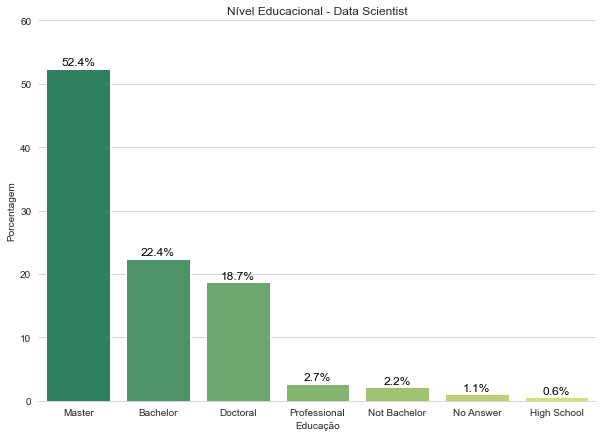

In [11]:
bar_plot_edu([roles_list[0]], palette = 'summer')

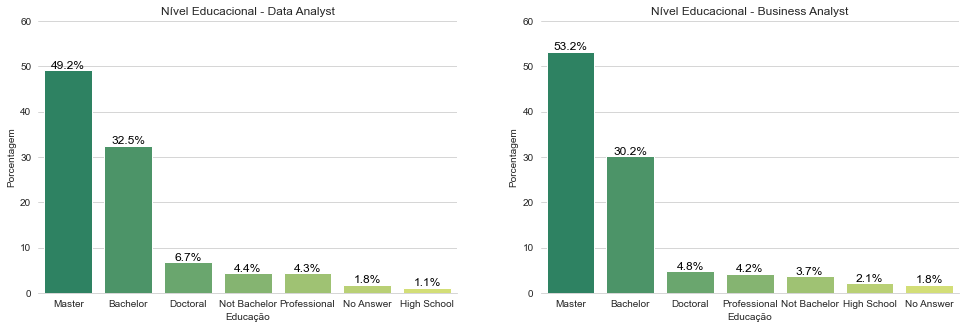

In [12]:
bar_plot_edu([roles_list[1], roles_list[2]], palette = 'summer')

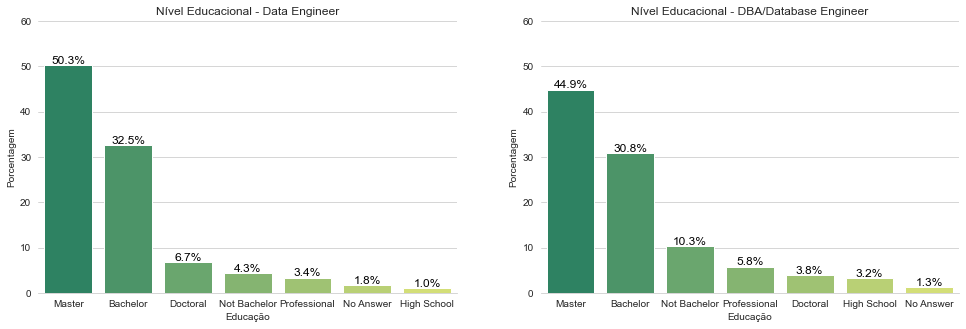

In [13]:
bar_plot_edu([roles_list[3], roles_list[4]], palette = 'summer')

<p>
    Podemos ver que, independente do cargo desempenhado na empresa, profissionais com <b>Mestrado</b> são sempre a maioria entre os participantes da pesquisa. A menor proporção de profissionais com Mestrado ocorre para DBA/Database Engineer e, ainda assim, esta proporção se aproxima de 45%.
</p>
<p>
    Para todas as profissões estudadas, o segundo nível de educação mais comum é o <b>Bacharelado</b>. É curioso que, entre os cientistas de dados, a proporção de bacharéis e doutores é muito próxima, especialmente se comparado às demais profissões.
</p>
<p>
    Quando se trata de educação, temos mais um aspecto importante que gostaríamos de compreender, e se refere aos <b>cursos</b> que estes profissionais costumam fazer. A relevância destes cursos e plataformas é inquestionável, já que muitos oferem uma abordagem mais prática e permitem que os estudantes sigam as aulas no seu próprio tempo. Além disso, considerando um mundo pós-pandemia, a adoção da educação online deve se tornar ainda mais importante.
</p>

In [14]:
# Criando uma lista de colunas relacionadas a cursos e plataformas:
platforms_list = ['course_Udacity', 'course_Coursera', 'course_edX', 'course_DataCamp', 'course_DataQuest', 'course_Kaggle', 
                'course_Fast-ai', 'course_Udemy', 'course_LinkedIn', 'course_University-Degree', 'course_None', 'course_Other']

# Definindo a função que cria os gráficos desejados:
def platform_rank(two_occupations, data = ds_survey, palette = 'GnBu_r'):
    '''
    INPUT:
    two_occupations - list, 1 or 2 "Current_Role" (profession) values as string
    data - dataframe, default = ds_survey
    palette - string, matplotlib palette, default = "GnBu_r"
    
    OUTPUT:
    figure plot - horizontal bar plot, x = Percentage, y = Platforms used by each profession
    '''
    # Creating objects:
    plat1 = []
    plat2 = []
    perc1 = []
    perc2 = []
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    
    # Defining the labels and style of the figure:
    x_label = 'Porcentagem'
    y_label = 'Plataforma de Ensino'
    sns.set_style("whitegrid")
    
    # If a plot for a single profession is required:
    if len(two_occupations) == 1:
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[0]]
        
        # Creating new dataframe with the needed values:
        for platform in platforms_list:
            plat1.append(platform.split('_')[1])
            perc1.append(round(df[platform].notnull().mean()*100, 2))
        
        df1['Platform'] = plat1
        df1['Percentage'] = perc1
        df1 = df1.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (9, 7))
        
        # Annotating percentages1:
        for i in range(0, len(df1['Percentage'])):
            ax.text((df1['Percentage'][i] + 0.5), i, str(round(df1['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting the plot:
        sns.barplot(x = 'Percentage', y = 'Platform', data = df1, palette = palette).set(
        xlabel = x_label,
        ylabel = y_label,
        title = 'Plataformas de Ensino - ' + two_occupations[0] + 's',
        xlim = (0,70))
        
        sns.despine(left=True)
        fig.show()
    
    # If a plot for two professions is required:
    elif len(two_occupations) == 2:
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[0]]
        
        # Creating new dataframes with the needed values:
        for platform in platforms_list:
            plat1.append(platform.split('_')[1])
            perc1.append(round(df[platform].notnull().mean()*100, 2))
        
        df1['Platform'] = plat1
        df1['Percentage'] = perc1
        df1 = df1.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        df = data[data['Current_Role'] == two_occupations[1]]
        for platform in platforms_list:
            plat2.append(platform.split('_')[1])
            perc2.append(round(df[platform].notnull().mean()*100, 2))
        
        df2['Platform'] = plat2
        df2['Percentage'] = perc2
        df2 = df2.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15.5, 8.5))
        
        # Annotating percentages 1:
        for i in range(0, len(df1['Percentage'])):
            ax[0].text((df1['Percentage'][i] + 0.5), i, str(round(df1['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting plot 1:
        sns.barplot(x = 'Percentage', y = 'Platform', data = df1, palette = palette, 
                    ax = ax[0]).set_title('Plataformas de Ensino - ' + two_occupations[0] + 's')
        ax[0].set_xlabel(x_label)
        ax[0].set_ylabel(y_label)
        ax[0].set_xlim(0,55)
        
        # Annotating percentages 2:
        for i in range(0, len(df2['Percentage'])):
            ax[1].text((df2['Percentage'][i] + 0.5), i, str(round(df2['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting plot 2:
        sns.barplot(x = 'Percentage', y = 'Platform', data = df2, palette = palette, 
                    ax = ax[1]).set_title('Plataformas de Ensino - ' + two_occupations[1] + 's')
        ax[1].set_xlabel(x_label)
        ax[1].set_ylabel(y_label)
        ax[1].set_xlim(0,55)
        
        sns.despine(left=True)
        fig.show()
    
    # If more than two professions are required:
    else:
        return print('two_occupations must be a list with 1 or 2 columns of interest')

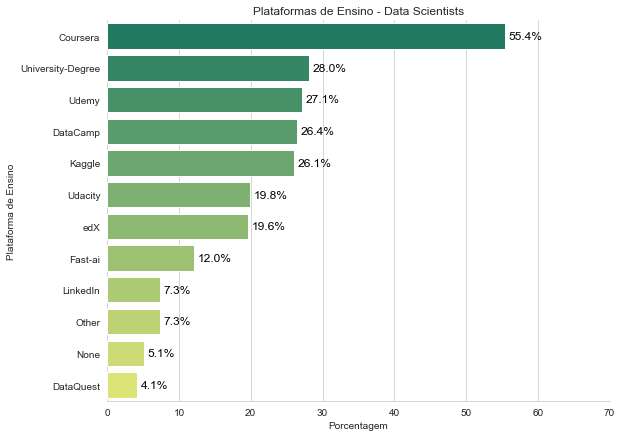

In [15]:
platform_rank([roles_list[0]], palette = 'summer')

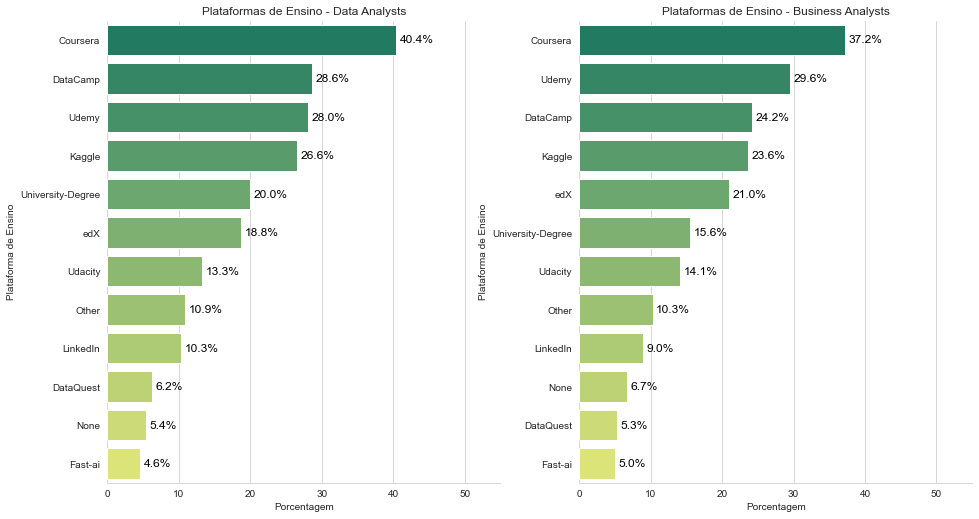

In [16]:
platform_rank([roles_list[1], roles_list[2]], palette = 'summer')

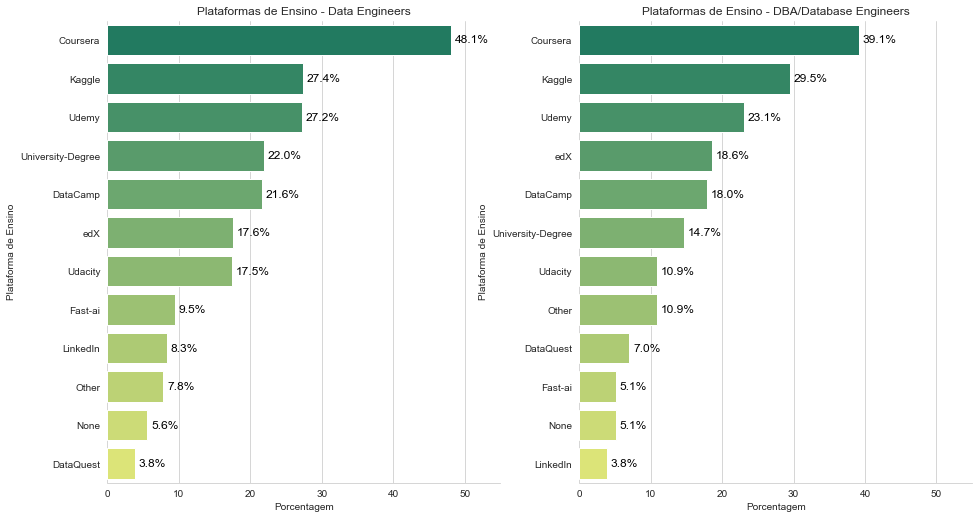

In [17]:
platform_rank([roles_list[3], roles_list[4]], palette = 'summer')

<p>
    De acordo com os profissionais participantes da pesquisa, <b>Coursera</b> parece ser a plataforma de ensino mais utilizada. É importante dizer que a pergunta proposta na pesquisa apresentava opções específicas de resposta e que mais de uma opção poderia ser selecionada. Com esta ressalva, parece que existe uma porcentagem maior de profissionais que já consumiu algum curso oferecido pela <b>Coursera</b> em comparação às demais plataformas.
</p>
<p>
    É interessante observar que para os cargos de data engineer e DBA/database engineers, a plataforma do <b>Kaggle</b> se destaca em segundo lugar, diferentemente do rank para as demais profissões.
</p>

<h3>Atividades</h3>

<p>
    Agora vamos avaliar quais são as atividades mais comuns que os profissionais desempenham no seu trabalho diário. Quando falamos de Data Science, é comum que as pessoas se sintam mais atraídas por tópicos relacionados a machine learning. Por isso será interessante avaliar se esta é a atividade mais desempenhada entre os profissionais da pesquisa.
</p>

In [18]:
# Criando uma lista de colunas relacionadas às atividades desempenhadas:
activities_list = ['actv_Data-Analysis', 'actv_Data-Infra', 'actv_ML-Prototypes', 
                   'actv_ML-Services', 'actv_ML-Improvement', 'actv_ML-Reserach', 'actv_None', 'actv_Other']

# Definindo a função para gerar os gráficos desejados:
def activites_rank(two_occupations, data = ds_survey, palette = 'GnBu_r'):
    '''
    INPUT:
    two_occupations - list, 1 or 2 "Current_Role" (profession) values as string
    data - dataframe, default = ds_survey
    palette - string, matplotlib palette, default = "GnBu_r"
    
    OUTPUT:
    figure plot - horizontal bar plot, x = Percentage, y = Activities performed by each profession
    '''
    # Creating objects:
    actv1 = []
    actv2 = []
    perc1 = []
    perc2 = []
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    
    # Defining the labels and style of the figure:
    x_label = 'Porcentagem'
    y_label = 'Atividades Desempenhadas'
    sns.set_style("whitegrid")
    
    # If a plot for a single profession is required:
    if len(two_occupations) == 1:
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[0]]
        
        # Creating new dataframe with the needed values:
        for activity in activities_list:
            actv1.append(activity.split('_')[1])
            perc1.append(round(df[activity].notnull().mean()*100, 2))
        
        df1['Activity'] = actv1
        df1['Percentage'] = perc1
        df1 = df1.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))
        
        # Annotating percentages:
        for i in range(0, len(df1['Percentage'])):
            ax.text((df1['Percentage'][i] + 0.5), i, str(round(df1['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting the plot:
        sns.barplot(x = 'Percentage', y = 'Activity', data = df1, palette = palette).set(
        xlabel = x_label,
        ylabel = y_label,
        title = 'Atividades Desempenhadas - ' + two_occupations[0] + 's',
        xlim = (0,80))
        
        sns.despine(left=True)
        fig.show()
    
    # If a plot for two professions is required:
    elif len(two_occupations) == 2:
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[0]]
        
        # Creating new dataframe with the needed values:
        for activity in activities_list:
            actv1.append(activity.split('_')[1])
            perc1.append(round(df[activity].notnull().mean()*100, 2))
        
        df1['Activity'] = actv1
        df1['Percentage'] = perc1
        df1 = df1.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[1]]
        
        # Creating new dataframes with the needed values:
        for activity in activities_list:
            actv2.append(activity.split('_')[1])
            perc2.append(round(df[activity].notnull().mean()*100, 2))
        
        df2['Activity'] = actv2
        df2['Percentage'] = perc2
        df2 = df2.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15.5, 8.5))
        
        # Annotating percentages 1:
        for i in range(0, len(df1['Percentage'])):
            ax[0].text((df1['Percentage'][i] + 0.5), i, str(round(df1['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting plot 1:
        sns.barplot(x = 'Percentage', y = 'Activity', data = df1, palette = palette, 
                    ax = ax[0]).set_title('Atividades Desempenhadas - ' + two_occupations[0] + 's')
        ax[0].set_xlabel(x_label)
        ax[0].set_ylabel(y_label)
        ax[0].set_xlim(0,60)
        
        # Annotating percentages 2:
        for i in range(0, len(df2['Percentage'])):
            ax[1].text((df2['Percentage'][i] + 0.5), i, str(round(df2['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting plot 2:
        sns.barplot(x = 'Percentage', y = 'Activity', data = df2, palette = palette, 
                    ax = ax[1]).set_title('Atividades Desempenhadas - ' + two_occupations[1] + 's')
        ax[1].set_xlabel(x_label)
        ax[1].set_ylabel(y_label)
        ax[1].set_xlim(0,60)
        
        sns.despine(left=True)
        fig.show()
    
    # If more than two professions are required:
    else:
        return print('two_occupations must be a list with 1 or 2 columns of interest')

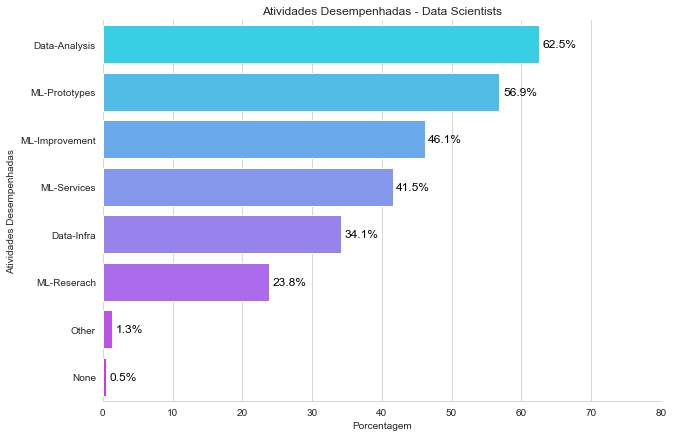

In [19]:
activites_rank([roles_list[0]], palette = 'cool')

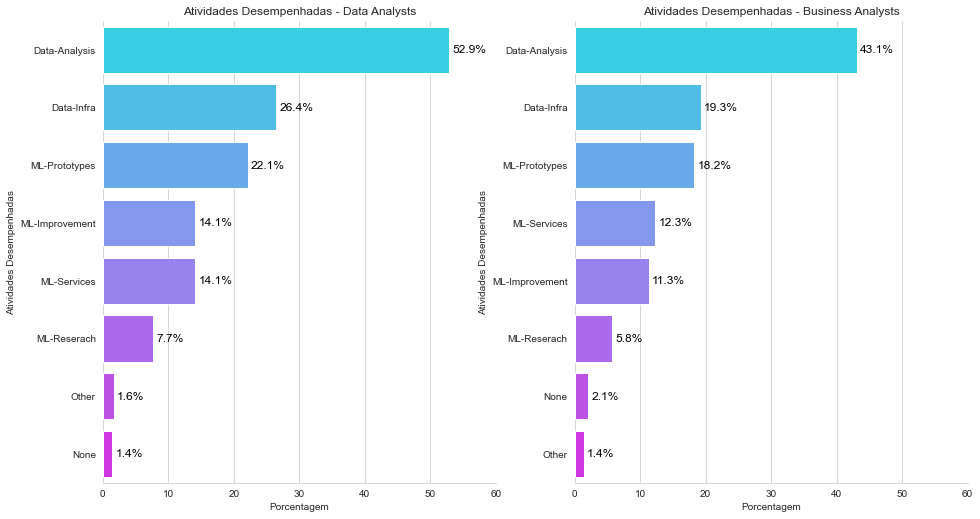

In [20]:
activites_rank([roles_list[1], roles_list[2]], palette = 'cool')

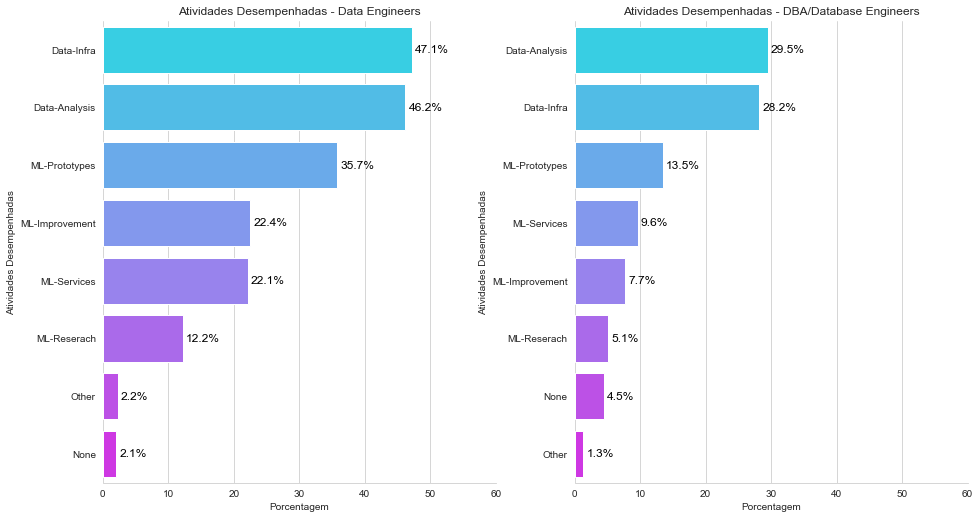

In [21]:
activites_rank([roles_list[3], roles_list[4]], palette = 'cool')

<p>
    Podemos observar que a <b>análise de dados</b> é a atividade mais desempenhada, exceto para a função de data engineer. Neste caso, como esperado, trabalhar com tarefas relacionadas à <b>infraestrutura de dados</b> é a atividade mais comum. Mesmo neste caso, a análise de dados ocupa uma posição de destaque.
</p>
<p>
    Segundo a pesquisa, lidar com infraestrutura de dados é a segunda atividade mais comum for data analysts e business analysts.
<p>
    Ainda que as atividades relacionadas a machine learning sejam muito representativas entre as tarefas desempenhadas por cientistas de dados, a análise de dados ainda aparece com maior relevância nas suas funções diárias. É interessante perceber que, ainda que infraestrutura seja uma função mais comumente relacionada a engenheiros de dados, em torno de 34% dos cientistas de dados desempenham atividades relacionadas à infraestrutura de dados.
</p>

<h3>Ferramentas</h3>

<p>
    Nosso objetivo é identificar quais são as ferramentas mais comuns utilizadas em Data Science, sejam elas linguagens de programação, frameworks de machine learning ou bancos de dados relacionais.
</p>

In [22]:
# Criando uma lista de colunas relacionadas a linguagens de programação:
languages_list = ['prog_Python', 'prog_R', 'prog_SQL', 'prog_C', 'prog_C++', 'prog_Java', 'prog_Javascript', 
                  'prog_Typerscript', 'prog_Bash', 'prog_MATLAB', 'prog_None', 'prog_Other']

# Definindo a função que gera os gráficos desejados:
def languages_rank(two_occupations, data = ds_survey, palette = 'GnBu_r'):
    '''
    INPUT:
    two_occupations - list, 1 or 2 "Current_Role" (profession) values as string
    data - dataframe, default = ds_survey
    palette - string, matplotlib palette, default = "GnBu_r"
    
    OUTPUT:
    figure plot - horizontal bar plot, x = Percentage, y = Languages used by each profession
    '''
    # Creating objects:
    lang1 = []
    lang2 = []
    perc1 = []
    perc2 = []
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    
    # Defining the labels and style of the figure:
    x_label = 'Porcentagem'
    y_label = 'Linguagens de Programação'
    sns.set_style("whitegrid")
    
    # If a plot for a single profession is required:
    if len(two_occupations) == 1:
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[0]]
        
        # Creating new dataframe with the needed values:
        for language in languages_list:
            lang1.append(language.split('_')[1])
            perc1.append(round(df[language].notnull().mean()*100, 2))
        
        df1['Language'] = lang1
        df1['Percentage'] = perc1
        df1 = df1.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (9, 7))
        
        # Annotating percentages:
        for i in range(0, len(df1['Percentage'])):
            ax.text((df1['Percentage'][i] + 0.5), i, str(round(df1['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting the plot:
        sns.barplot(x = 'Percentage', y = 'Language', data = df1, palette = palette).set(
        xlabel = x_label,
        ylabel = y_label,
        title = 'Linguagens de Programação - ' + two_occupations[0] + 's',
        xlim = (0,90))
        
        sns.despine(left=True)
        fig.show()
    
    # If a plot for two professions is required:
    elif len(two_occupations) == 2:
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[0]]
        
        # Creating new dataframe with the needed values:
        for language in languages_list:
            lang1.append(language.split('_')[1])
            perc1.append(round(df[language].notnull().mean()*100, 2))
        
        df1['Language'] = lang1
        df1['Percentage'] = perc1
        df1 = df1.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[1]]
        
        # Creating new dataframes with the needed values:
        for language in languages_list:
            lang2.append(language.split('_')[1])
            perc2.append(round(df[language].notnull().mean()*100, 2))
        
        df2['Language'] = lang2
        df2['Percentage'] = perc2
        df2 = df2.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15.5, 8.5))
        
        # Annotating percentages 1:
        for i in range(0, len(df1['Percentage'])):
            ax[0].text((df1['Percentage'][i] + 0.5), i, str(round(df1['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting plot 1:
        sns.barplot(x = 'Percentage', y = 'Language', data = df1, palette = palette, 
                    ax = ax[0]).set_title('Linguagens de Programação - ' + two_occupations[0] + 's')
        ax[0].set_xlabel(x_label)
        ax[0].set_ylabel(y_label)
        ax[0].set_xlim(0,80)
        
        # Annotating percentages 2:
        for i in range(0, len(df2['Percentage'])):
            ax[1].text((df2['Percentage'][i] + 0.5), i, str(round(df2['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting plot 2:
        sns.barplot(x = 'Percentage', y = 'Language', data = df2, palette = palette, 
                    ax = ax[1]).set_title('Linguagens de Programação - ' + two_occupations[1] + 's')
        ax[1].set_xlabel(x_label)
        ax[1].set_ylabel(y_label)
        ax[1].set_xlim(0,80)
        
        sns.despine(left=True)
        fig.show()
    
    # If more than two professions are required:
    else:
        return print('two_occupations must be a list with 1 or 2 columns of interest')

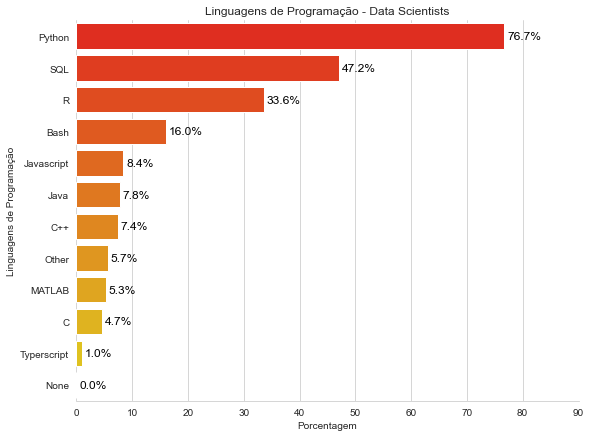

In [23]:
languages_rank([roles_list[0]], palette = 'autumn')

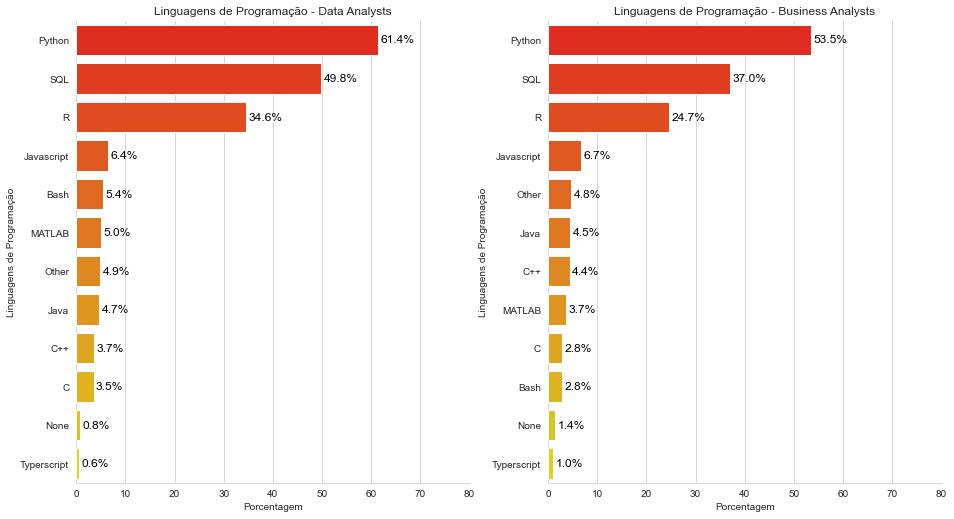

In [24]:
languages_rank([roles_list[1], roles_list[2]], palette = 'autumn')

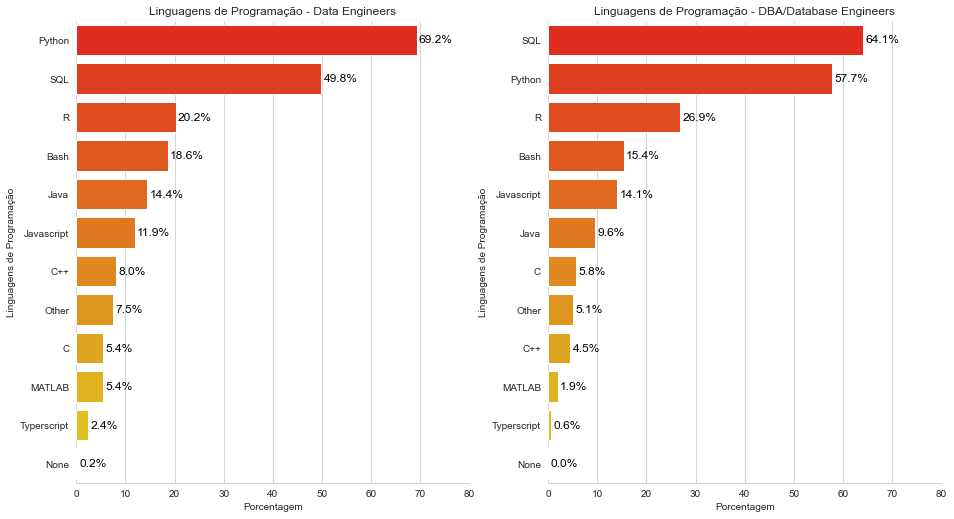

In [25]:
languages_rank([roles_list[3], roles_list[4]], palette = 'autumn')

<p>
    Sem dúvidas, <b>Python</b> e <b>SQL</b> são as linguagens mais utilizadas nas áreas de Data Science. SQL ultrapassa Python apenas para a função de DBA/database engineer, o que poderia ser esperado.
</p>
<p>
    Para cientistas de dados, Python é utilizado por quase 80% dos participantes da pesquisa, mostrando o quão popular e poderosa esta linguagem pode ser. Por outro lado, a simplicidade da SQL não representa todo o seu poder: não importa qual a especialização dentro da Ciência de Dados, de acordo com a pesquisa, SQL será muito importante no desempenho das funções necessárias.
</p>
<p>
    <b>R</b> aparece consolidada na terceira posição, representando uma alterantiva a Python, no entanto, não se destaca como linguagem principal em nenhum dos grupos de profissionais.
</p>

In [26]:
# Criando uma lista de colunas relacionadas a frameworks de machine learning:
mlframew_list = ['ml_framew_Scikit', 'ml_framew_TensorFlow', 'ml_framew_Keras', 'ml_framew_RandomForest', 
                 'ml_framew_Xgboost', 'ml_framew_Pytorch', 'ml_framew_Caret', 'ml_framew_LightGBM', 
                 'ml_framew_SparkMLib', 'ml_framew_Fast-ai', 'ml_framew_None', 'ml_framew_Other']

# Definindo a função que gera os gráficos desejados:
def mlframew_rank(two_occupations, data = ds_survey, palette = 'GnBu_r'):
    '''
    INPUT:
    two_occupations - list, 1 or 2 "Current_Role" (profession) values as string
    data - dataframe, default = ds_survey
    palette - string, matplotlib palette, default = "GnBu_r"
    
    OUTPUT:
    figure plot - horizontal bar plot, x = Percentage, y = Frameworks used by each profession
    '''
    # Creating objects:
    frame1 = []
    frame2 = []
    perc1 = []
    perc2 = []
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    
    # Defining the labels and style of the figure:
    x_label = 'Porcentagem'
    y_label = 'Machine Learning Framework'
    sns.set_style("whitegrid")
    
    # If a plot for a single profession is required:
    if len(two_occupations) == 1:
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[0]]
        
        # Creating new dataframe with the needed values:
        for framework in mlframew_list:
            frame1.append(framework.split('_')[2])
            perc1.append(round(df[framework].notnull().mean()*100, 2))
        
        df1['Framework'] = frame1
        df1['Percentage'] = perc1
        df1 = df1.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (9, 7))
        
        # Annotating percentages1:
        for i in range(0, len(df1['Percentage'])):
            ax.text((df1['Percentage'][i] + 0.5), i, str(round(df1['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting the plot:
        sns.barplot(x = 'Percentage', y = 'Framework', data = df1, palette = palette).set(
        xlabel = x_label,
        ylabel = y_label,
        title = 'Frameworks de Machine Learning - ' + two_occupations[0] + 's',
        xlim = (0,80))
        
        sns.despine(left=True)
        fig.show()
    
    # If a plot for two professions is required:
    elif len(two_occupations) == 2:
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[0]]
        
        # Creating new dataframe with the needed values:
        for framework in mlframew_list:
            frame1.append(framework.split('_')[2])
            perc1.append(round(df[framework].notnull().mean()*100, 2))
        
        df1['Framework'] = frame1
        df1['Percentage'] = perc1
        df1 = df1.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[1]]
        
        # Creating new dataframes with the needed values:
        for framework in mlframew_list:
            frame2.append(framework.split('_')[2])
            perc2.append(round(df[framework].notnull().mean()*100, 2))
        
        df2['Framework'] = frame2
        df2['Percentage'] = perc2
        df2 = df2.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15.5, 8.5))
        
        # Annotating percentages 1:
        for i in range(0, len(df1['Percentage'])):
            ax[0].text((df1['Percentage'][i] + 0.5), i, str(round(df1['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting plot 1:
        sns.barplot(x = 'Percentage', y = 'Framework', data = df1, palette = palette, 
                    ax = ax[0]).set_title('Frameworks de Machine Learning - ' + two_occupations[0] + 's')
        ax[0].set_xlabel(x_label)
        ax[0].set_ylabel(y_label)
        ax[0].set_xlim(0,60)
        
        # Annotating percentages 2:
        for i in range(0, len(df2['Percentage'])):
            ax[1].text((df2['Percentage'][i] + 0.5), i, str(round(df2['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting plot 2:
        sns.barplot(x = 'Percentage', y = 'Framework', data = df2, palette = palette, 
                    ax = ax[1]).set_title('Frameworks de Machine Learning - ' + two_occupations[1] + 's')
        ax[1].set_xlabel(x_label)
        ax[1].set_ylabel(y_label)
        ax[1].set_xlim(0,60)
        
        sns.despine(left=True)
        fig.show()
    
    # If more than two professions are required:
    else:
        return print('two_occupations must be a list with 1 or 2 columns of interest')

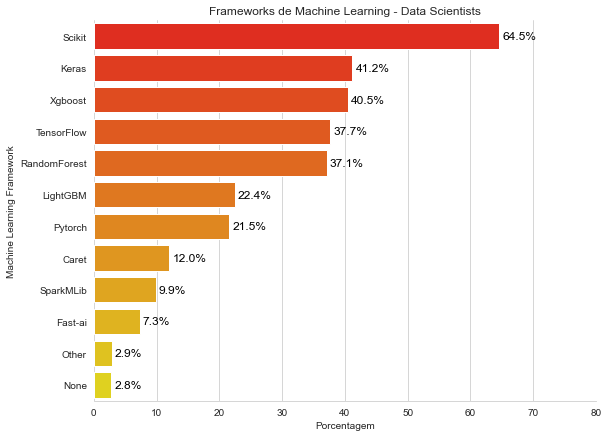

In [27]:
mlframew_rank([roles_list[0]], palette = 'autumn')

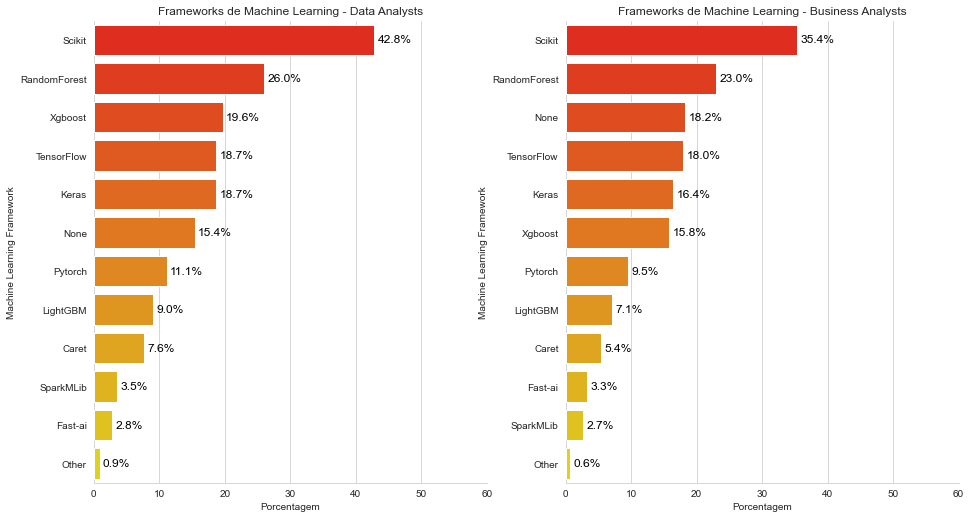

In [28]:
mlframew_rank([roles_list[1], roles_list[2]], palette = 'autumn')

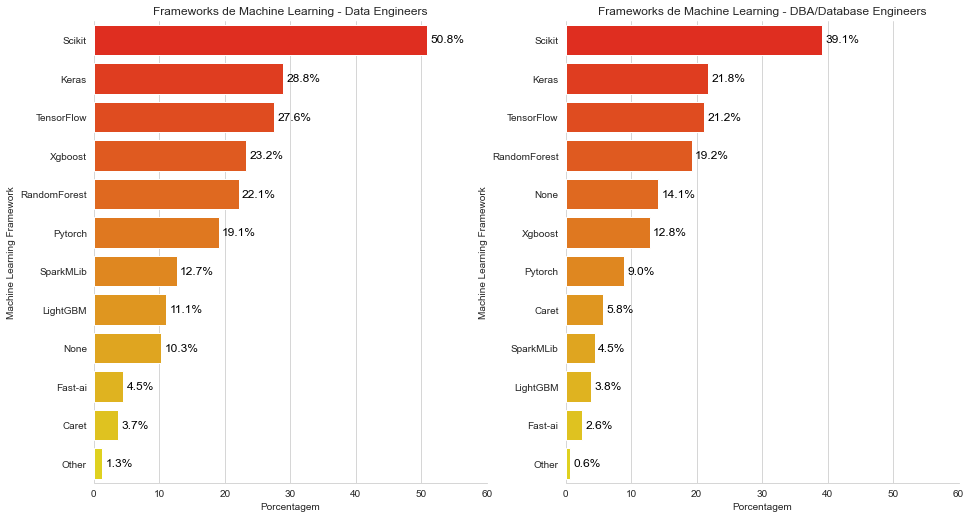

In [29]:
mlframew_rank([roles_list[3], roles_list[4]], palette = 'autumn')

<p>
    Uma vez que descobrimos Python como a linguagem mais utilizada entre os participantes da pesquisa do Kaggle, já era esperado que o <b>Scikit-Learn</b> seria também o mais utilizado framework de machine learning, e nós acabamos de confirmar este fato.
</p>
<p>
    O que chama atenção é o fato de que, entre data analysts and business analysts, o <b>Random Forest</b> é o segundo framework mais utilizado, enquanto que, para os demais profissionais, este lugar pertence ao framework <b>Keras</b>.
</p>

In [30]:
# Criando uma lista de colunas relacionadas a bancos de dados:
reldb_list = ['relDB_MySQL', 'relDB_PostgresSQL', 'relDB_SQLite', 'relDB_SQLServer', 'relDB_Oracle', 
              'relDB_Access', 'relDB_AWS-relDB-Server', 'relDB_AWS-DynamoDB', 'relDB_AzureSQL', 
              'relDB_GoogleCloudSQL', 'relDB_None', 'relDB_Other']

# Definindo a função que gera os gráficos desejados:
def reldb_rank(two_occupations, data = ds_survey, palette = 'GnBu_r'):
    '''
    INPUT:
    two_occupations - list, 1 or 2 "Current_Role" (profession) values as string
    data - dataframe, default = ds_survey
    palette - string, matplotlib palette, default = "GnBu_r"
    
    OUTPUT:
    figure plot - horizontal bar plot, x = Percentage, y = Relational databases used by each profession
    '''
    # Creating objects:
    db1 = []
    db2 = []
    perc1 = []
    perc2 = []
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    
    # Defining the labels and style of the figure:
    x_label = 'Porcentagem'
    y_label = 'Bancos de Dados Relacionais'
    sns.set_style("whitegrid")
    
    # If a plot for a single profession is required:
    if len(two_occupations) == 1:
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[0]]
        
        # Creating new dataframe with the needed values:
        for db in reldb_list:
            db1.append(db.split('_')[1])
            perc1.append(round(df[db].notnull().mean()*100, 2))
        
        df1['Database'] = db1
        df1['Percentage'] = perc1
        df1 = df1.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (9, 7))
        
        # Annotating percentages:
        for i in range(0, len(df1['Percentage'])):
            ax.text((df1['Percentage'][i] + 0.5), i, str(round(df1['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting the plot:
        sns.barplot(x = 'Percentage', y = 'Database', data = df1, palette = palette).set(
        xlabel = x_label,
        ylabel = y_label,
        title = 'Bancos de Dados Relacionais - ' + two_occupations[0] + 's',
        xlim = (0,50))
        
        sns.despine(left=True)
        fig.show()
    
    # If a plot for two professions is required:
    elif len(two_occupations) == 2:
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[0]]
        
        # Creating new dataframe with the needed values:
        for db in reldb_list:
            db1.append(db.split('_')[1])
            perc1.append(round(df[db].notnull().mean()*100, 2))
        
        df1['Database'] = db1
        df1['Percentage'] = perc1
        df1 = df1.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[1]]
        
        # Creating new dataframes with the needed values:
        for db in reldb_list:
            db2.append(db.split('_')[1])
            perc2.append(round(df[db].notnull().mean()*100, 2))
        
        df2['Database'] = db2
        df2['Percentage'] = perc2
        df2 = df2.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15.5, 8.5))
        
        # Annotating percentages 1:
        for i in range(0, len(df1['Percentage'])):
            ax[0].text((df1['Percentage'][i] + 0.5), i, str(round(df1['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting plot 1:
        sns.barplot(x = 'Percentage', y = 'Database', data = df1, palette = palette, 
                    ax = ax[0]).set_title('Bancos de Dados Relacionais - ' + two_occupations[0] + 's')
        ax[0].set_xlabel(x_label)
        ax[0].set_ylabel(y_label)
        ax[0].set_xlim(0,50)
        
        # Annotating percentages 2:
        for i in range(0, len(df2['Percentage'])):
            ax[1].text((df2['Percentage'][i] + 0.5), i, str(round(df2['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting plot 2:
        sns.barplot(x = 'Percentage', y = 'Database', data = df2, palette = palette, 
                    ax = ax[1]).set_title('Bancos de Dados Relacionais - ' + two_occupations[1] + 's')
        ax[1].set_xlabel(x_label)
        ax[1].set_ylabel(y_label)
        ax[1].set_xlim(0,50)
        
        sns.despine(left=True)
        fig.show()
    
    # If more than two professions are required:
    else:
        return print('two_occupations must be a list with 1 or 2 columns of interest')

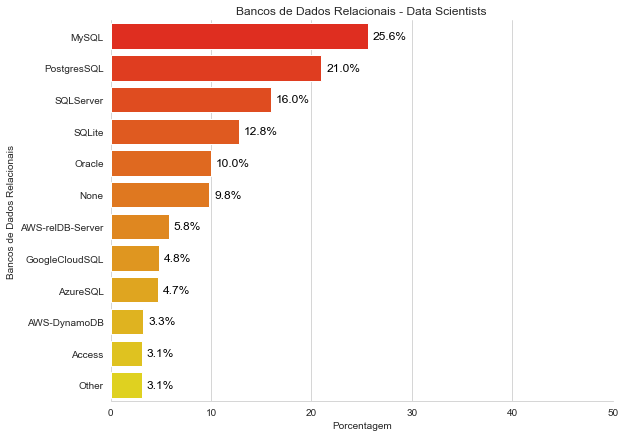

In [31]:
reldb_rank([roles_list[0]], palette = 'autumn')

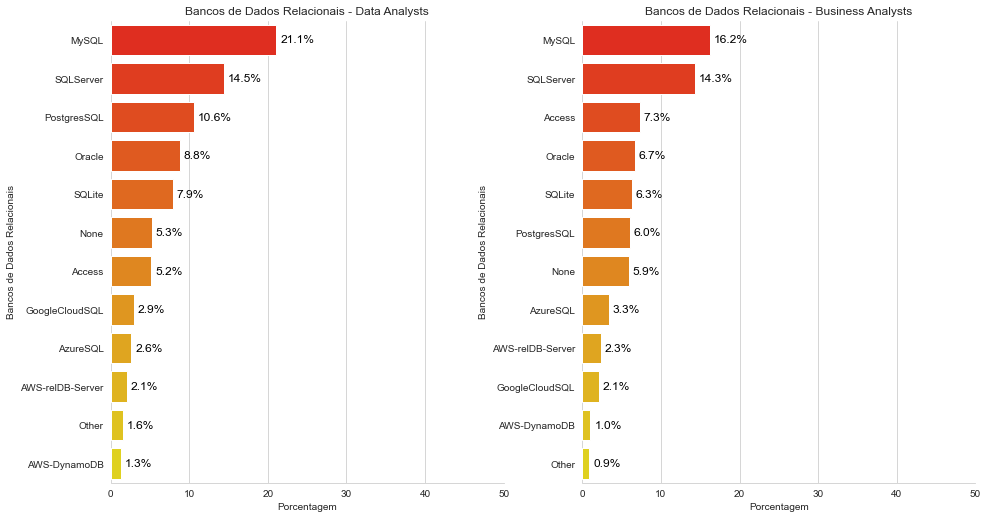

In [32]:
reldb_rank([roles_list[1], roles_list[2]], palette = 'autumn')

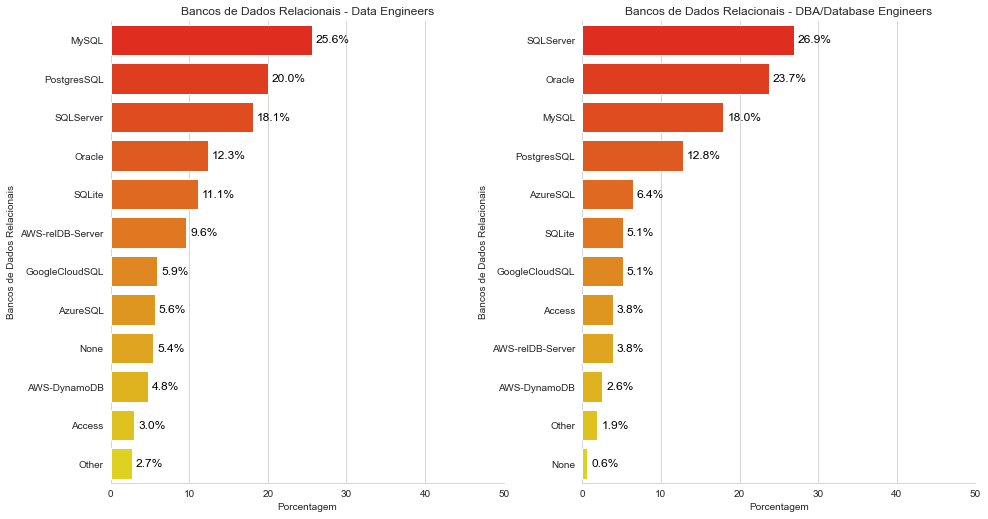

In [33]:
reldb_rank([roles_list[3], roles_list[4]], palette = 'autumn')

<p>
    Quando o assunto é banco de dados relacional, <b>MySQL</b> se destaca na grande maioria dos grupos. MySQL apenas cede espaço para o <b>SQL Server</b> entre os DBA/databases engineers.
</p>
<p>
    Podemos perceber que os <b>serviços em nuvem</b> como Google Cloud SQL ainda não ultrapassaram os bancos tradicionais como MySQL, Postgrees e SQL Server, mas para muitos isto é apenas uma questão de tempo, já que a computação em nuvem traz uma série de benefícios em termos de estrutura física, manutenção ou até mesmo custos (é possível pagar pelo armazenamento/processamento em nuvem apenas pelo espaço ou tempo utilizados).
</p>

<h3>Salário</h3>

<p>
    Vamos falar sobre dinheiro?
</p>

In [34]:
# Observando como as informações de salário foram tratadas na pesquisa:
ds_survey['Annual_Income'].value_counts()

$0-999             762
10,000-14,999      408
100,000-124,999    406
40,000-49,999      392
30,000-39,999      389
50,000-59,999      378
1,000-1,999        326
60,000-69,999      312
70,000-79,999      286
125,000-149,999    275
20,000-24,999      260
5,000-7,499        253
15,000-19,999      248
150,000-199,999    244
25,000-29,999      242
7,500-9,999        215
80,000-89,999      203
90,000-99,999      202
2,000-2,999        185
3,000-3,999        139
4,000-4,999        126
200,000-249,999     74
> $500,000          42
250,000-299,999     34
300,000-500,000     28
Name: Annual_Income, dtype: int64

In [35]:
# Avaliando valores missing para salário:
null_perc = ds_survey['Annual_Income'].isnull().mean()
print('Por volta de ' + str(int((null_perc*100))) + '% dos participantes da pesquisa não declararam seu salário.')

Por volta de 11% dos participantes da pesquisa não declararam seu salário.


<p>
    Duas coisas a serem consideradas:
    <li> ainda que tenhamos filtrado o dataframe de modo que estudantes e pessoas sem emprego fossem excluídas, 762 profissionais declararam que seus salários estão na faixa de 0 to 999 dólares anuais. Vamos considerar que, ainda assim, as respostas sejam válidas;</li>
    <li> cerca de 11% não declarou o salário e estes registros serão ignorados enquanto estivermos tratando do tema salário.</li>
</p>

In [36]:
# Criando uma função que transforma a faixa salarial em salário médio:
def range_to_avg_salary(row):
    '''
    INPUT:
    row - range of salary values as string
    
    OUTPUT:
    avg_salary - average salary value as integer
    '''
    if type(row) == str:
        # Salary range 0 - 999:
        if row.startswith('$'):
            avg_salary = 500

        # Salary range > 500,000:
        elif row.startswith('>'):
            avg_salary = 500000

        # Salary range 1,000 to 500,000 or Nan:
        else:
            numbers = row.replace(',', '').split('-')
            num1 = int(numbers[0])
            num2 = int(numbers[1])
            avg_salary = (num1 + (num2 + 1))/2
    else:
        avg_salary = np.nan
            
    return avg_salary

# Aplicando a função:
ds_survey['Avg_Salary'] = ds_survey['Annual_Income'].apply(range_to_avg_salary)

# Excluindo as linhas com valores missing para salário:
ds_survey_sal = ds_survey.dropna(subset = ['Avg_Salary'])

In [37]:
# Salário médio por ocupação (média):
ds_survey_sal.groupby('Current_Role')['Avg_Salary'].mean().sort_values(ascending = False)

Current_Role
Data Scientist           61546.225275
Data Engineer            54965.519964
DBA/Database Engineer    48978.420863
Business Analyst         44159.825513
Data Analyst             36105.681722
Name: Avg_Salary, dtype: float64

In [38]:
# Salário médio por ocupação (mediana):
ds_survey_sal.groupby('Current_Role')['Avg_Salary'].median().sort_values(ascending = False)

Current_Role
Data Scientist           45000.0
Data Engineer            35000.0
DBA/Database Engineer    35000.0
Business Analyst         22500.0
Data Analyst             17500.0
Name: Avg_Salary, dtype: float64

In [39]:
# Salário médio por gênero (média):
ds_survey_sal.groupby('Gender')['Avg_Salary'].mean().sort_values(ascending = False)

Gender
Prefer to self-describe    159625.000000
Prefer not to say           66725.701389
Male                        54714.825527
Female                      44003.631171
Name: Avg_Salary, dtype: float64

In [40]:
# Contando observações por gênero:
ds_survey_sal.Gender.value_counts()

Male                       5316
Female                     1033
Prefer not to say            72
Prefer to self-describe       8
Name: Gender, dtype: int64

In [41]:
# Já que temos apenas 8 observações para 'Prefer to self_describe', vamos desconsiderá-los:
ds_survey_gender = ds_survey_sal[ds_survey_sal['Gender'] != 'Prefer to self-describe']

In [42]:
# Salário médio por gênero (mean) - excluindo 'Prefer to self_describe':
ds_survey_gender.groupby('Gender')['Avg_Salary'].mean().sort_values(ascending = False)

Gender
Prefer not to say    66725.701389
Male                 54714.825527
Female               44003.631171
Name: Avg_Salary, dtype: float64

In [43]:
# Salário médio por gênero (mediana) - excluindo 'Prefer to self_describe':
ds_survey_gender.groupby('Gender')['Avg_Salary'].median().sort_values(ascending = False)

Gender
Prefer not to say    45000.0
Male                 35000.0
Female               22500.0
Name: Avg_Salary, dtype: float64

In [44]:
# Salário médio por nível educacional (média):
ds_survey_sal.groupby('Education')['Avg_Salary'].mean().sort_values(ascending = False)

Education
Doctoral degree                                                      80326.816456
Master’s degree                                                      54417.020199
No formal education past high school                                 50907.903509
Some college/university study without earning a bachelor’s degree    44650.528796
I prefer not to answer                                               43188.356164
Professional degree                                                  40730.419355
Bachelor’s degree                                                    40278.300293
Name: Avg_Salary, dtype: float64

In [45]:
# Salário médio por nível educacional (mediana):
ds_survey_sal.groupby('Education')['Avg_Salary'].median().sort_values(ascending = False)

Education
Doctoral degree                                                      65000.0
Master’s degree                                                      35000.0
Professional degree                                                  17500.0
No formal education past high school                                 17500.0
I prefer not to answer                                               17500.0
Some college/university study without earning a bachelor’s degree    12500.0
Bachelor’s degree                                                    12500.0
Name: Avg_Salary, dtype: float64

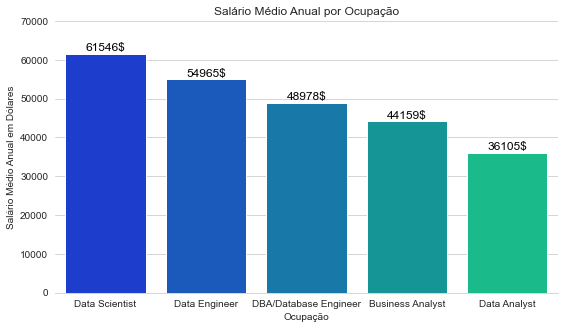

In [46]:
# Criando um grádico para salário médio por ocupação:
# Agrupando por ocupação e calculando o salário médio:
occ_sal = ds_survey_sal.groupby('Current_Role')['Avg_Salary'].mean().sort_values(ascending = False)
        
# Criando a figura:
x_label = 'Ocupação' 
y_label = 'Salário Médio Anual em Dólares'
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (9, 5))

# Anotando as porcentagens:
for occ in range(0, len(occ_sal.values)):
    ax.text(occ, (occ_sal.values[occ] + 1500), str(int(occ_sal.values[occ]))+'$', c = 'k', 
            fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center' , ha= 'center')

# Configurando o gráfico:
sns.barplot(x = occ_sal.index, y = occ_sal.values, palette = 'winter').set(
xlabel = x_label,
ylabel = y_label,
title = 'Salário Médio Anual por Ocupação',
ylim = (0,70000))       
sns.despine(left=True)
fig.show()

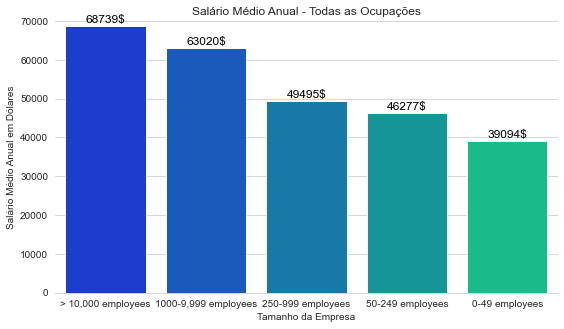

In [47]:
# Agrupando pelo número de funcionários e calculando o salário médio:
comp_sal = ds_survey_sal.groupby('Company_Size')['Avg_Salary'].mean().sort_values(ascending = False)
        
# Creating the figure:
x_label = 'Tamanho da Empresa' 
y_label = 'Salário Médio Anual em Dólares'
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (9, 5))

# Annotating avg salary:
for comp in range(0, len(comp_sal.values)):
    ax.text(comp, (comp_sal.values[comp] + 1500), str(int(comp_sal.values[comp]))+'$', c = 'k', 
            fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center' , ha= 'center')

# Setting the plot:
sns.barplot(x = comp_sal.index, y = comp_sal.values, palette = 'winter').set(
xlabel = x_label,
ylabel = y_label,
title = 'Salário Médio Anual - Todas as Ocupações',
ylim = (0,70000))       
sns.despine(left=True)
fig.show()

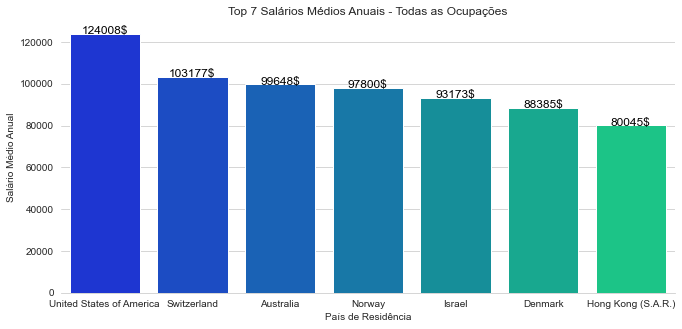

In [48]:
# Agrupando pelo país e calculando o salário médio:
country_sal = ds_survey_sal.groupby('Res_Country')['Avg_Salary'].mean().sort_values(ascending = False)
        
# Creating the figure:
x_label = 'País de Residência' 
y_label = 'Salário Médio Anual'
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (11, 5))

# Annotating avg salary:
for country in range(0, 7):
    ax.text(country, (country_sal.values[country] + 1500), str(int(country_sal.values[country]))+'$', c = 'k', 
            fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center' , ha= 'center')

# Setting the plot:
sns.barplot(x = country_sal.index[0:7], y = country_sal.values[0:7], palette = 'winter').set(
xlabel = x_label,
ylabel = y_label,
title = 'Top 7 Salários Médios Anuais - Todas as Ocupações',
ylim = (0,130000))       
sns.despine(left=True)
fig.show()

<p>
    Calculating the mean annual income for the different occupations, it looks like <b>data scientists</b> are more likely to be better paid than the others, followed by <b>data engineers</b>.
</p>
<p>
    For the overall occupations in the Data Science field, <b>bigger companies</b> seem to pay best salaries, and the <b>United States</b> is the country with the highest average salary.
</p>

In [49]:
def plot_salary(occupation, ds_df = ds_survey_sal, ds_gen = ds_survey_gender, palette = 'GnBu_r', y_top = 90000):
    '''
    INPUT:
    occupation - string, 1 "Current_Role" (profession) value as string
    ds_df - dataframe with salaries converted to numeric, default = ds_survey_sal
    ds_gen - dataframe with filtered gender, default = ds_suhttps://medium.com/@evertonbin/5-stories-data-tell-us-about-data-scientists-7b970a90a8aarvey_gender
    palette - string, matplotlib palette, default = "GnBu_r"
    y_top = numeric, default = 90000 (limit for y axis)
    
    OUTPUT:
    figure plot - horizontal bar plot, x = Percentage, y = Relational databases used by each profession
    '''
    # Filtering dataframe for specific occupation:
    df1 = ds_df[ds_df['Current_Role'] == occupation]
    # Grouping by Education:
    ed_df = df1.groupby('Education')['Avg_Salary'].mean().sort_values(ascending = False)
    
    # Simplifying degree value:
    label_dict = {'Doctoral degree': 'Doctoral', 
                  'Master’s degree': 'Master', 
                  'Bachelor’s degree': 'Bachelor', 
                  'Professional degree': 'Professional', 
                  'Some college/university study without earning a bachelor’s degree': 'Not Bachelor', 
                  'No formal education past high school': 'High School', 
                  'I prefer not to answer': 'No Answer'}

    label = list(ed_df.index)
    for k, v in label_dict.items():
        for i in range(0, len(label)):
            if k == label[i]:
                label[i] = v
    
    # Filtering dataframe for specific occupation:
    df2 = ds_gen[ds_gen['Current_Role'] == occupation]
    # Grouping by Gender:
    gen_df = df2.groupby('Gender')['Avg_Salary'].mean().sort_values(ascending = False)

    sns.set_style("whitegrid")
            
    # Creating the figure:
    fig = plt.figure(figsize=(15.5,7))
    gs = gridspec.GridSpec(nrows=1, 
                           ncols=3, 
                           figure=fig, 
                           width_ratios= [1, 1, 1],
                           height_ratios=[1],
                           wspace=0.3,
                           hspace=1)
    ax0 = fig.add_subplot(gs[0:2])
    ax1 = fig.add_subplot(gs[2:3])
    
    # Annotating avg salary per Education:
    for ed in range(0, len(ed_df.values)):
        ax0.text(ed, (ed_df.values[ed] + 1500), str(int(ed_df.values[ed]))+'$', c = 'k',
                 fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center' , ha= 'center')
    # Annotating avg salary per Gender:
    for gn in range(0, len(gen_df.values)):
        ax1.text(gn, (gen_df.values[gn] + 1500), str(int(gen_df.values[gn]))+'$', c = 'k',
                 fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center' , ha= 'center')
    
    # Setting plot 1:
    sns.barplot(x = label, y = ed_df.values, palette = palette, 
                ax = ax0).set_title('Salário Médio Anual - ' + occupation)
    ax0.set_xlabel('Nível de Educação')
    ax0.set_ylabel('Salário Médio Anual em Dólares')
    ax0.set_ylim(0, y_top)
    
    # Setting plot 2:
    sns.barplot(x = gen_df.index, y = gen_df.values, palette = palette, 
                ax = ax1).set_title('Salário Médio Anual por Gênero - ' + occupation)
    ax1.set_xlabel('Gênero')
    ax1.set_ylabel('Salário Médio Anual')
    ax1.set_ylim(0, y_top)
        
    sns.despine(left=True)
    fig.show()

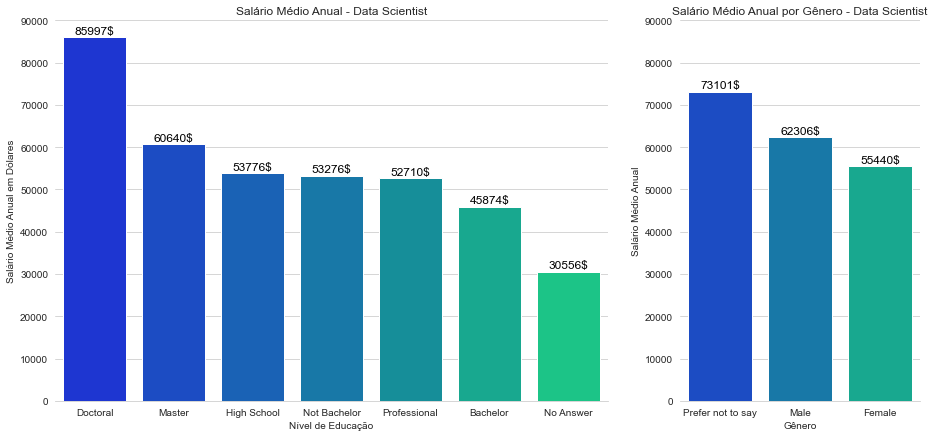

In [50]:
plot_salary(roles_list[0], palette = 'winter')

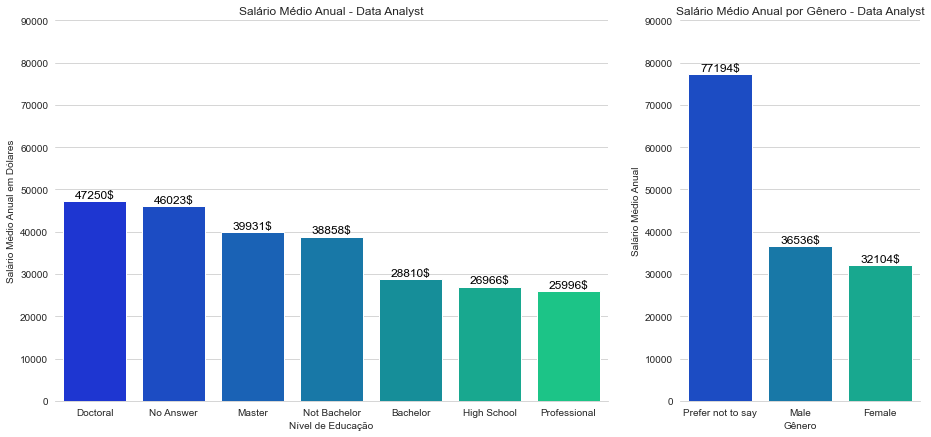

In [51]:
plot_salary(roles_list[1], palette = 'winter')

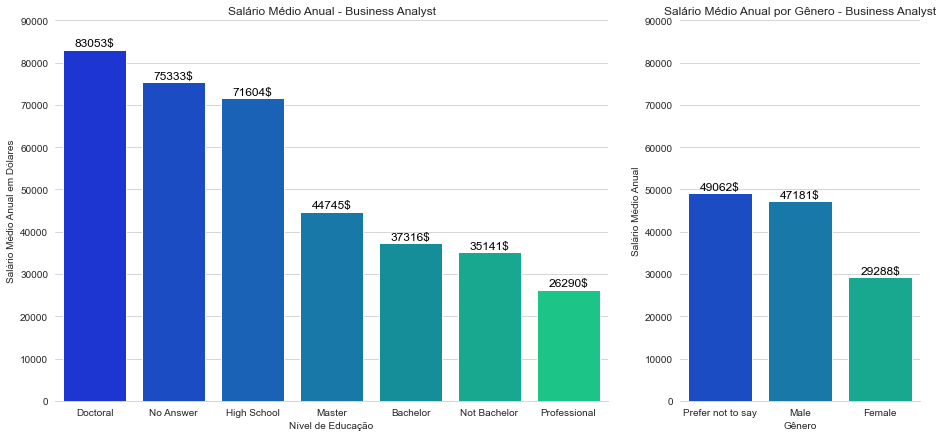

In [52]:
plot_salary(roles_list[2], palette = 'winter')

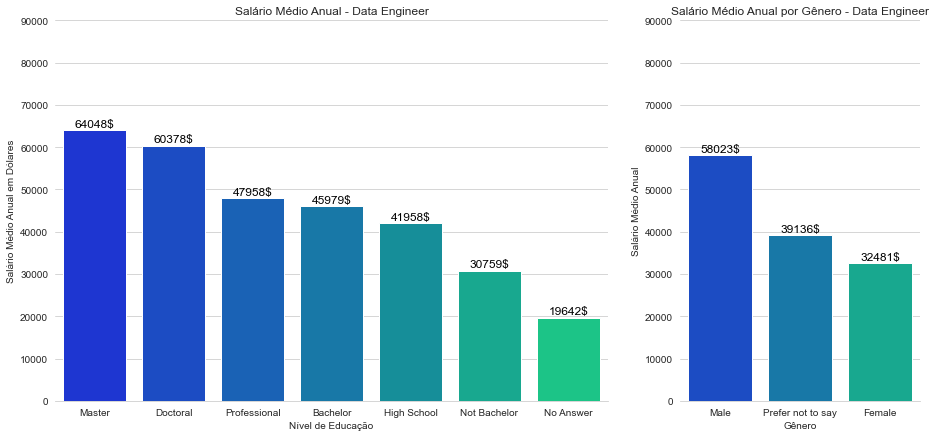

In [53]:
plot_salary(roles_list[3], palette = 'winter')

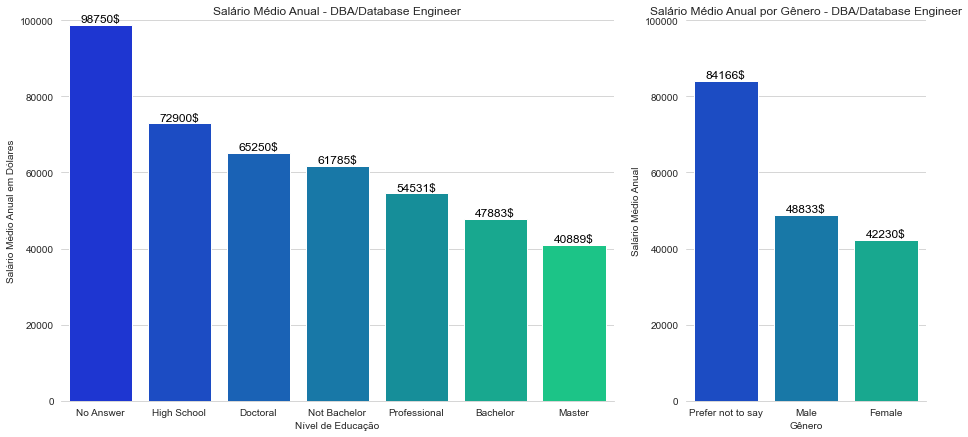

In [54]:
plot_salary(roles_list[4], palette = 'winter', y_top = 100000)

<p>
    Em se tratando de salário, temos muito a considerar antes de destacarmos alguma conclusão, já que, por exemplo, as pessoas que preferem não declarar o seu gênero são as que apresentam maior média salarial. Ainda, entre data / business analysts e dba/database engineers, pessoas que decidiram não responder sobre o seu nível educacional aparecem em destaque com melhores médias salariais.
</p>
<p>
    Dadas as limitações, ter um <b>Doutorado</b> normalmente está relacionado com melhores pagamentos. Em se tratando de cientistas de dados, engenheiros de dados and e analistas de dados, o <b>Mestrado</b> também está relacionado a melhores pagamentos, ainda que isso não pareça ser verdadeiro para as demais ocupações. Por outro lado, o <b>Bacharel</b> não pode ser relacionado com pagamentos maiores, o que poderia indicar que, com exceção dos graus de Mestrado e Doutorado, mais importante do que o nível educacional é o conhecimento adquirido e o domínio no campo de atuação.
</p>
<p>
    Infelizmente, mas não surpreendentemente, mulheres têm uma média salarial inferior em relação aos homens em qualquer uma das ocupações abordadas neste projeto.
</p>

<h2>4- Modelo Preditivo</h2>

<h3>Transformações</h3>

In [55]:
# Transformando colunas específicas para o formato dummy:
full_list = platforms_list + activities_list + languages_list + mlframew_list + reldb_list

for col in full_list:
    bool_col = ds_survey[col].isnull()
    for i in range(0, len(bool_col)):
        if bool_col[i]:
            ds_survey[col].iloc[i] = int(0)
        else:
            ds_survey[col].iloc[i] = int(1)
    ds_survey[col] = pd.to_numeric(ds_survey[col])

In [56]:
# Transformando Current Role em variável do tipo categórica, já que esta é a coluna que queremos tentar prever:
ds_survey['Current_Role'] = ds_survey['Current_Role'].astype('category')

In [57]:
# Transformando as outras variáveis de interesse em variáveis do tipo dummy:
cat_columns = ['Education', 'Years_Coding']
df_model = pd.get_dummies(ds_survey, columns = cat_columns, drop_first = True)
df_model.shape

(7241, 75)

In [58]:
# Já que queremos descobrir quâo bem o nível educacional, cursos, habilidades e atividades podem distinguir as diferentes
# ocupações, vamos excluir as demais colunas que não se relacionam com estas informações:
df_model = df_model.drop(columns = ['Age', 'Gender', 'Res_Country', 'Company_Size', 'Annual_Income', 'Avg_Salary'])

In [59]:
df_model.head()

,Current_Role,actv_Data-Analysis,actv_Data-Infra,actv_ML-Prototypes,actv_ML-Services,actv_ML-Improvement,actv_ML-Reserach,actv_None,actv_Other,course_Udacity,...,Education_Master’s degree,Education_No formal education past high school,Education_Professional degree,Education_Some college/university study without earning a bachelor’s degree,Years_Coding_10-20 years,Years_Coding_20+ years,Years_Coding_3-5 years,Years_Coding_5-10 years,Years_Coding_< 1 years,Years_Coding_I have never written code
0,Data Scientist,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,Data Scientist,1,0,0,0,1,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,Data Scientist,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Data Scientist,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Data Analyst,1,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [60]:
# Separando o dataframe em dados de treino e dados de teste:
X = df_model.loc[:, df_model.columns != 'Current_Role']
y = df_model['Current_Role']

<h3>Seleção de Atributos</h3>

In [61]:
# Criando um modelo de Árvore de Decisão para o dataframe completo para avaliarmos quais são os atributos principais:
tree_model = DecisionTreeClassifier(random_state = 100)
tree_model.fit(X, y)

DecisionTreeClassifier(random_state=100)

In [62]:
# Observando os atributos por ordem de importância:
feat_imp = pd.DataFrame()
feat_imp['Feature'] = X.columns
feat_imp['Importance'] = tree_model.feature_importances_
feat_imp = feat_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Observando os 15 primeiros atributos mais importantes:
feat_imp.head(15)

,Feature,Importance
0,actv_ML-Prototypes,0.074791
1,course_Coursera,0.029422
2,course_Kaggle,0.027685
3,Education_Master’s degree,0.027355
4,actv_ML-Services,0.027031
5,Years_Coding_3-5 years,0.025205
6,actv_Data-Analysis,0.025051
7,course_DataCamp,0.024951
8,course_Udemy,0.023696
9,course_edX,0.022296


In [63]:
# Observando os 15 atributos menos importantes:
feat_imp.tail(15)

,Feature,Importance
53,prog_C,0.007957
54,ml_framew_Fast-ai,0.007919
55,Years_Coding_I have never written code,0.007326
56,relDB_AWS-relDB-Server,0.007222
57,Education_I prefer not to answer,0.006886
58,relDB_AzureSQL,0.006765
59,Education_No formal education past high school,0.006146
60,relDB_AWS-DynamoDB,0.005572
61,relDB_Other,0.004990
62,Years_Coding_20+ years,0.004944


<p>
    Podemos ver que atividade de machine learning aparece como a mais na distinção das diferentes profissões. Vimos anteriormente que estas atividades relacionadas a machine learning são mais comumente desempenhadas por cientistas de dados e, provavelmente, seja por isso que tenha sido escolhido como o atributo mais relevante na separação das profissões.  
</p>
<p>
    As outras variáveis mais importantes apresentam valores similares, sendo as relacionadas a atividades e cursos como as mais comuns.
<p>
    Vamos selecionar 50 variáveis para o modelo preditivo, de acordo com a sua ordem de importância, e veremos quão boa será a performance do modelo na distinção das profissões.
</p>

In [64]:
# Selecionando os 50 primeiros atributos:
features = []
for i in range(0, 50):
    feature = feat_imp.Feature.iloc[i]
    features.append(feature)

<h3>Treinamento do Modelo</h3>

In [65]:
# Avaliando o balanço de classes:
df_model.Current_Role.value_counts()

Data Scientist           4085
Data Analyst             1598
Business Analyst          778
Data Engineer             624
DBA/Database Engineer     156
Name: Current_Role, dtype: int64

<p>
    Temos cinco classes distintas e algumas com poucas observações. Ainda assim, o dataframe não será balanceado, já que apenas queremos ter uma visão geral de quão bem o modelo consegue diferenciar as diferentes classes/profissões.
</p>

In [66]:
# Separando em dados de treino e de teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 100)

In [67]:
# Utilizando GridSearchCV para encontrar os melhores parâmetros:
grid_values = {'n_estimators': [25, 50, 75, 100, 150], 'max_features': [3, 5, 7, 10, 13], 'max_depth': [None, 5, 15, 30]}
rf_model = RandomForestClassifier()

grid_rf_f1 = GridSearchCV(rf_model, param_grid = grid_values, scoring = 'f1_micro')
grid_rf_f1.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 15, 30],
                         'max_features': [3, 5, 7, 10, 13],
                         'n_estimators': [25, 50, 75, 100, 150]},
             scoring='f1_micro')

In [68]:
# Melhores parâmetros:
grid_rf_f1.best_params_

{'max_depth': 15, 'max_features': 10, 'n_estimators': 150}

In [69]:
# Melhor desempenho:
grid_rf_f1.best_score_

0.6154293981008234

In [70]:
# Treinando o modelo para os melhores parâmetros:
rf_final_model = RandomForestClassifier(max_depth = 15, max_features = 10, n_estimators = 75)
rf_final_model.fit(X_train, y_train)

# Fazendo as previsões em dados de teste:
y_pred = rf_final_model.predict(X_test)

<h3>Avaliação do Modelo</h3>

In [71]:
f1 = f1_score(y_test, y_pred, average = 'micro')
f1

0.5849056603773585

<p>
    Podemos perceber que o modelo não tem um bom desempenho na tarefa de compreender os diferentes perfis que se traduziriam em diferentes profissões no campo da Data Science.
</p>
<p>
    E faz sentido. <b>Data Science</b> é um campo novo e é caracterizado como sendo a interseção de diferentes áreas de conhecimento, como estatística, ciência da computação e negócios. Sendo assim, ainda que um determinado cientista de dados não seja responsável pela infraestrutura dos dados, ele ainda terá que ter conhecimentos de programação, enquanto um engenheiro de dados pode não atuar no desenvolvimento de algoritmos de machine learning, mas ainda terá de lidar com transformação de dados, criando, por exemplo, pipelines.
</p>
<p>
    É comum também que empresas anunciem vagas, por exemplo, para um analista de dados, enquanto a descrição da vaga se relaciona mais a um engenheiro de dados. Não poderíamos classificar como um grande erro, uma vez que as diferentes especializações têm muito em comum e, em algumas empresas, eles são responsáveis por todo o processo, desde a estrutura dos dados até à colocação do modelo em produção.
</p>

<h2>5- Conclusão</h2>

<li><b>Educação</b>: uma parcela significativa dos participantes da pesquisa do Kaggle tem o grau de Mestre, mas ainda assim consumir cursos em plataformas online como Coursera, Udemy, DataCamp, Udacity e muitas outras parece ser algo comum.</li>
<li><b>Atividades</b>: nem tudo é sobre algoritmos de machine learning. Não importa qual é a sua especialização no campo de Data Science, é muito provável que você terá que lidar com processos de análise de dados.</li>
<li><b>Ferramentas</b>: as linguagens de programação mais utilizadas são Python e SQL e os frameworks de machine learning mais populares são o Scikit-Learn, seguido por Keras e Random Forest. Quando se trata de bancos de dados relacionais, MySQL é o que se destaca.</li>
<li><b>Salário</b>: cientistas de dados tendem a apresentar alguma vantagem quando o assunto é dinheiro, especialmente se eles residem nos EUA, e empresas maiores têm a tendência de oferecer salários melhores em comparação com empresas menores. No entanto, ainda temos más notícias: mesmo neste campo, mulheres têm salários menores em comparação aos homens.</li>
<li><b>Educção x Salário</b>: Doutorado e Mestrado parecem turbinar os ganhos salariais, mas temos muitos profissionais com diferentes níveis de educação, desde bacharéis até os que completaram somente o Ensino Médio e não percebemos diferenças significativas no quesito salário, o que pode indicar que Data Science é uma área aberta a todos aqueles que se dedicam para desenvolver as habilidades e os conhecimentos necessários.</li>